In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
%matplotlib inline

In [26]:
train = pd.read_csv('dataset-0510/train.csv')

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 235 entries, building_id to total_price
dtypes: float64(37), int64(197), object(1)
memory usage: 107.3+ MB


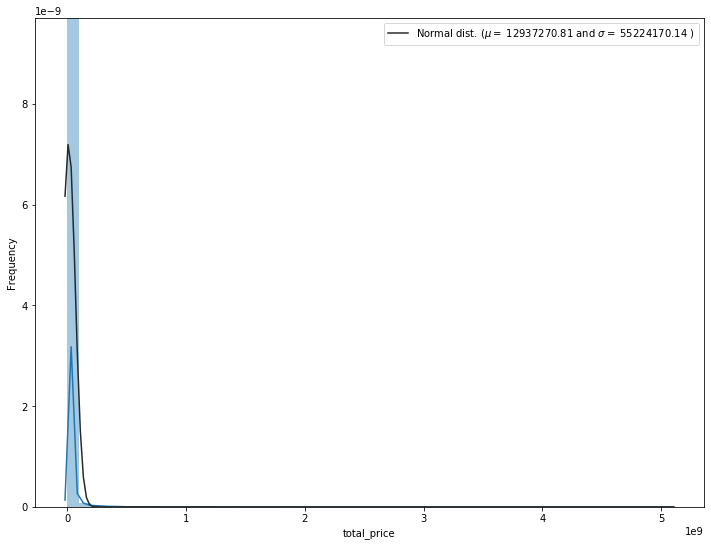

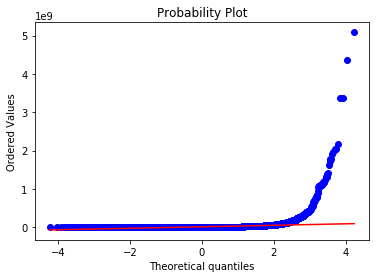

In [4]:
plt.subplots(figsize=(12,9))
sns.distplot(train['total_price'], fit=stats.norm)

# Get the fitted parameters used by the function

(mu, sigma) = stats.norm.fit(train['total_price'])

# plot with the distribution

plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)], loc='best')
plt.ylabel('Frequency')

#Probablity plot

fig = plt.figure()
stats.probplot(train['total_price'], plot=plt)
plt.show()

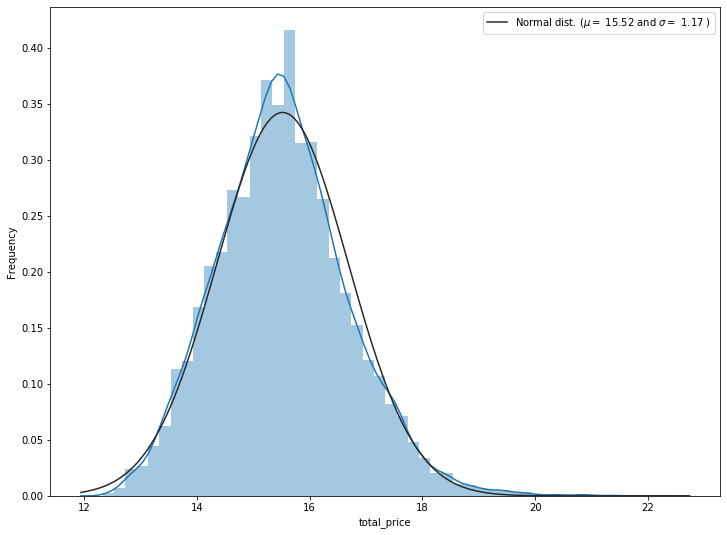

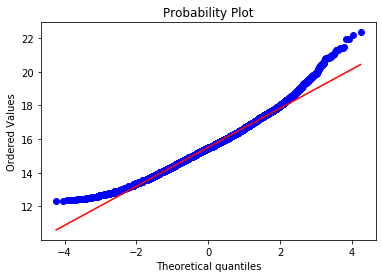

In [5]:
train['total_price'] = np.log1p(train['total_price'])

plt.subplots(figsize=(12,9))
sns.distplot(train['total_price'], fit=stats.norm)

# Get the fitted parameters used by the function

(mu, sigma) = stats.norm.fit(train['total_price'])

# plot with the distribution

plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)], loc='best')
plt.ylabel('Frequency')

#Probablity plot

fig = plt.figure()
stats.probplot(train['total_price'], plot=plt)
plt.show()

In [6]:
train.columns[train.isnull().any()]

Index(['parking_area', 'parking_price', 'txn_floor', 'village_income_median'], dtype='object')

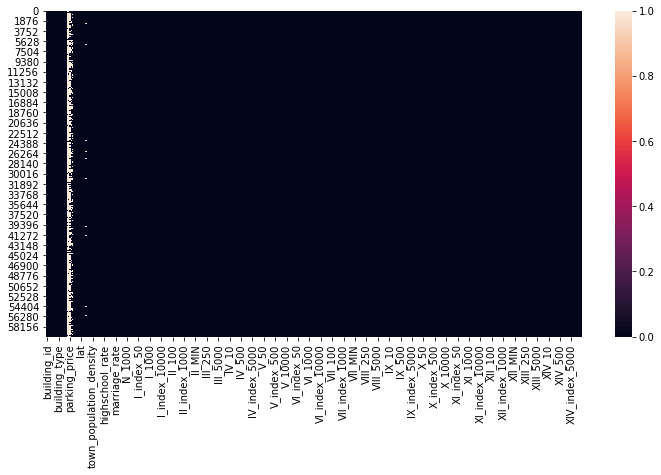

In [7]:
#plot of missing value attributes
plt.figure(figsize=(12, 6))
sns.heatmap(train.isnull())
plt.show()

In [29]:
train['total_price'] = train['total_price'] - train['parking_price']

In [36]:
#missing value counts in each of these columns
Isnull = train.isnull().sum()/len(train)*100
Isnull = Isnull[Isnull>0]
Isnull.sort_values(inplace=True, ascending=False)
Isnull

Series([], dtype: float64)

In [16]:
train_corr = train.select_dtypes(include=[np.number])

In [17]:
train_corr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 234 entries, building_material to total_price
dtypes: float64(37), int64(197)
memory usage: 107.1 MB


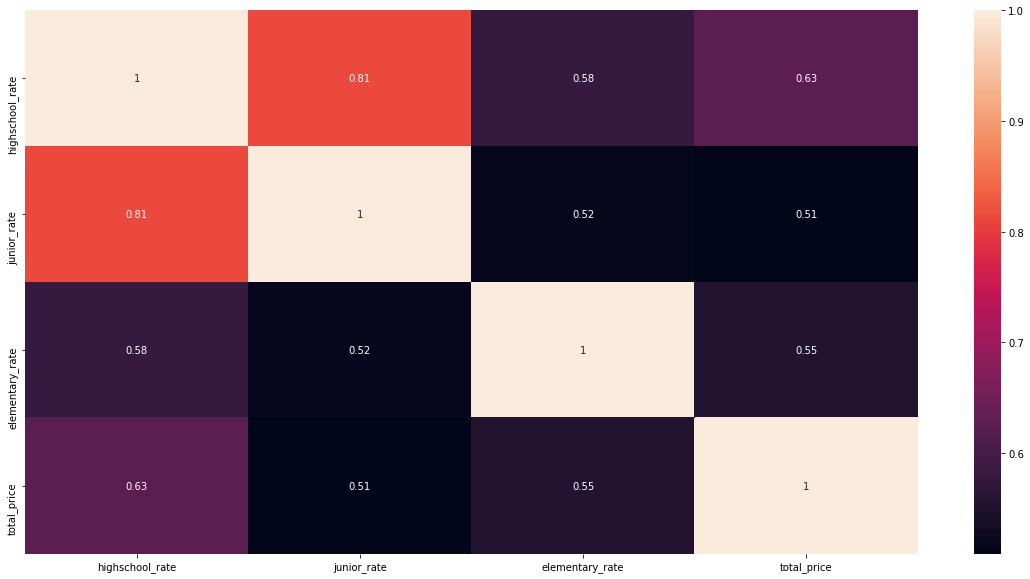

In [19]:
corr = train_corr.corr()
top_feature = corr.index[abs(corr['total_price']>0.4)]
plt.subplots(figsize=(20, 10))
top_corr = train[top_feature].corr()
sns.heatmap(top_corr, annot=True)
plt.show()

In [20]:
corr = train.corr()
corr.sort_values(['total_price'], ascending=False, inplace=True)
corr.total_price

total_price         1.000000
highschool_rate     0.626898
elementary_rate     0.553235
junior_rate         0.508784
divorce_rate        0.386165
parking_way         0.259240
XIII_MIN            0.223598
VI_MIN              0.203583
town                0.201505
XI_MIN              0.200018
town_area           0.174578
X_MIN               0.167080
IV_MIN              0.165058
VII_MIN             0.160507
I_MIN               0.133872
IX_MIN              0.114549
III_MIN             0.103608
V_MIN               0.101379
death_rate          0.101081
II_MIN              0.095988
VIII_MIN            0.062960
building_type       0.048121
marriage_rate       0.046365
XII_index_50        0.044364
XIV_MIN             0.032614
I_10                0.013067
XIV_10              0.011588
IV_10               0.009323
city                0.007947
VI_10               0.005720
                      ...   
bachelor_rate      -0.633458
XIII_5000          -0.686236
parking_price      -1.000000
I_index_5000  

In [28]:
train['parking_price'] = train['parking_price'].fillna(0)

In [31]:
train = train.drop(['parking_area'], axis=1)

In [33]:
train = train.drop(['txn_floor'], axis=1)
train = train.drop(['village_income_median'], axis=1)

In [37]:
train.head(1)

,building_id,building_material,city,txn_dt,total_floor,building_type,building_use,building_complete_dt,parking_way,parking_price,...,XIV_500,XIV_index_500,XIV_1000,XIV_index_1000,XIV_5000,XIV_index_5000,XIV_10000,XIV_index_10000,XIV_MIN,total_price
0,e3mMIMR3JJqCaXz1,8,21,18674,4,3,2,6271,2,0.0,...,58,1,157,1,2483,1,6011,1,34.469803,647603.770472


In [45]:
train.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Data columns (total 230 columns):
building_material          60000 non-null int64
city                       60000 non-null int64
txn_dt                     60000 non-null int64
total_floor                60000 non-null int64
building_type              60000 non-null int64
building_use               60000 non-null int64
building_complete_dt       60000 non-null int64
parking_way                60000 non-null int64
parking_price              60000 non-null float64
land_area                  60000 non-null float64
building_area              60000 non-null float64
town                       60000 non-null int64
lat                        60000 non-null float64
lon                        60000 non-null float64
town_population            60000 non-null float64
town_area                  60000 non-null float64
town_population_density    60000 non-null float64
doc_rate                   60000 non-null float64
master_r

In [40]:
train = train.drop(['building_id'], axis=1)

In [42]:
y = train['total_price']

In [44]:
del train['total_price']

In [46]:
X = train.values
y = y.values

In [47]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)

In [48]:
from sklearn import linear_model
model = linear_model.LinearRegression()

In [51]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=1000)

In [52]:
model.fit(X_train, y_train)

MemoryError: could not allocate 3145728 bytes

In [57]:
from sklearn.ensemble import GradientBoostingRegressor
GBR = GradientBoostingRegressor(n_estimators=100, max_depth=4)

In [56]:
GBR.fit(X_train, y_train)

MemoryError: 